In [1]:
%matplotlib inline
from CartPole import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from sklearn import linear_model
import math
from sklearn.decomposition import PCA

# Task 4
## Defining action as non-linear combination of system state variables

In [2]:
plot_path = 'plots/Task4/'

In [3]:
n=20
no_RBC = 5
# x_train, y_train, x_test, y_test = generate_data(n) # TODO change these to values more evenly spaced
index_to_variable = {0 : 'cart_location', 1 : 'cart_velocity', 2 : 'pole_angle', 3 : 'pole_velocity', 4 : 'action'}
policy_training_data = np.random.normal(0,1,(n,4))#TODO write a function to do this better
# policy_training_data = np.array([[0,0,np.random.normal(),0,0] for i in range())

alpha_start = np.random.uniform(-3,3,4)
w_i_start = np.random.uniform(-0.1,0.1,no_RBC)
W_ = np.random.uniform(-0.1,0.1,(4,4))
W_start = np.matmul(W_.T,W_) # This is to ensure it is symmetric
X_i_vals = policy_training_data[np.random.randint(0,n,no_RBC)]

In [4]:
pca = PCA()#n_components=4
pca.fit(policy_training_data)
U = pca.components_
sing_ = pca.singular_values_
sing_matrix = np.zeros((4,4))
for i in range(4):
    sing_matrix[i,i] = sing_[i] 
W = np.matmul(np.matmul(U.T,sing_matrix), U)
W

array([[ 2.91017875,  0.19403318, -0.12596431, -0.25156164],
       [ 0.19403318,  4.16324644, -0.51166223,  0.4218959 ],
       [-0.12596431, -0.51166223,  3.02484391, -0.24203946],
       [-0.25156164,  0.4218959 , -0.24203946,  3.60666019]])

In [5]:
array_start = np.concatenate((w_i_start, W_start.flatten()))
kwargs_ = {'linear':False, 'w_i':w_i_start, 'X_i_vals':X_i_vals, 'entire_array':array_start,
           'W':W, 'parameter_to_be_optimised':'w_i', 
           'model_predictive_control':False, 'alpha':0.5,
           'sig_start':np.array([0.75, 0.6, 0.25, 0.4]),
           'sig_end':np.array([0.75, 0.6, 0.25, 0.4])}

optim_ = scipy.optimize.minimize(training_loss, w_i_start, method = 'Nelder-Mead',
                        args=(np.array([0.5,0.5,0.5,0.5,0]), kwargs_), 
                              options={'disp':True})
w_i = optim_['x'][:-16]
w_i_start, w_i, w_i_start.shape

[ 0.01428834  0.05489673  0.0496808  -0.03648472  0.02151376]
cumulative_loss: 	 29.9827
29.982654249635758
[ 0.01500276  0.05489673  0.0496808  -0.03648472  0.02151376]
cumulative_loss: 	 29.9827
29.98265429010068
[ 0.01428834  0.05764157  0.0496808  -0.03648472  0.02151376]
cumulative_loss: 	 29.9827
29.98265531077942
[ 0.01428834  0.05489673  0.05216484 -0.03648472  0.02151376]
cumulative_loss: 	 29.9827
29.98265425042291
[ 0.01428834  0.05489673  0.0496808  -0.03830895  0.02151376]
cumulative_loss: 	 29.9827
29.98265424905769
[ 0.01428834  0.05489673  0.0496808  -0.03648472  0.02258945]
cumulative_loss: 	 29.9827
29.982654665497382
[ 0.01457411  0.0521519   0.05067442 -0.03721441  0.02194403]
cumulative_loss: 	 29.9827
29.982653371074793
[ 0.01471699  0.04940706  0.05117123 -0.03757926  0.02215917]
cumulative_loss: 	 29.9827
29.982652401173773
[ 0.01474557  0.05270086  0.05127059 -0.03765223  0.02069624]
cumulative_loss: 	 29.9827
29.982653110657203
[ 0.01392828  0.05182252  0.0519

cumulative_loss: 	 29.9644
29.96438630343363
[  2.84801255 -50.16330157  17.16881668 -13.0244558   -0.6257373 ]
cumulative_loss: 	 29.9567
29.956718316702215
[  2.63461526 -46.43603835  15.90406754 -12.08156952  -0.58226257]
cumulative_loss: 	 29.959
29.958999551075614
[  2.98423667 -52.63909599  18.02829651 -13.67978871  -0.66602975]
cumulative_loss: 	 29.9552
29.955182786098973
[  3.88862345 -68.69536294  23.51199964 -17.83471226  -0.87627857]
cumulative_loss: 	 29.9453
29.94525607336356
[  3.92325966 -69.32244121  23.71893709 -18.00690823  -0.89392088]
cumulative_loss: 	 29.9449
29.94486922295032
[  5.24492895 -92.79746108  31.73017367 -24.09010986  -1.20939832]
cumulative_loss: 	 29.9316
29.931603062435602
[  4.85855366 -85.84089687  29.355005   -22.27384753  -1.10976969]
cumulative_loss: 	 29.9353
29.935296511413217
[   5.89790632 -104.32577063   35.65188164  -27.05094655   -1.33263736]
cumulative_loss: 	 29.9261
29.92605238950094
[   7.90086586 -139.8649291    47.76975078  -36.24

cumulative_loss: 	 29.8554
29.85537136033474
[  54.66614981 -970.11275448  331.07224641 -251.14945201  -12.64512159]
cumulative_loss: 	 29.8554
29.855392889696407
[  55.85780262 -991.26367238  338.28750165 -256.62199807  -12.91852426]
cumulative_loss: 	 29.8554
29.8553713777402
[  56.25048189 -998.23666091  340.67037815 -258.42957776  -13.01364928]
cumulative_loss: 	 29.8554
29.855384088203337
[  55.32001826 -981.7174907   335.02980292 -254.15106599  -12.79370187]
cumulative_loss: 	 29.8554
29.855369992882167
[  54.96110776 -975.33255073  332.85028745 -252.49514388  -12.70826013]
cumulative_loss: 	 29.8554
29.855379231213735
[  55.75487256 -989.44146291  337.66701278 -256.15222651  -12.89666644]
cumulative_loss: 	 29.8554
29.85536973008059
[  56.12546242 -996.01836443  339.91006498 -257.85315588  -12.98149589]
cumulative_loss: 	 29.8554
29.855378962235353
[  55.36550231 -982.52345098  335.30588168 -254.36014576  -12.80514149]
cumulative_loss: 	 29.8554
29.855369401232448
[  55.09367053

cumulative_loss: 	 29.8554
29.855368347267163
[  55.55081454 -985.81446862  336.42871439 -255.21204674  -12.84816872]
cumulative_loss: 	 29.8554
29.85536834590079
[  55.54233361 -985.66392778  336.37735966 -255.17309094  -12.84621644]
cumulative_loss: 	 29.8554
29.85536834704283
[  55.55016836 -985.80302311  336.4248057  -255.20908501  -12.84801251]
cumulative_loss: 	 29.8554
29.855368345891822
[  55.54414951 -985.69608266  336.38830335 -255.18137722  -12.84659548]
cumulative_loss: 	 29.8554
29.855368345901432
[  55.55044791 -985.80791588  336.42648593 -255.21034182  -12.84808134]
cumulative_loss: 	 29.8554
29.855368345709817
[  55.55349396 -985.86195485  336.44493453 -255.2243261   -12.84879283]
cumulative_loss: 	 29.8554
29.855368346313497
[  55.5514519  -985.82576621  336.4325631  -255.21495749  -12.84830397]
cumulative_loss: 	 29.8554
29.855368345909824
[  55.5523153  -985.84105955  336.43777574 -255.21891197  -12.84849814]
cumulative_loss: 	 29.8554
29.855368345891645
[  55.547706

cumulative_loss: 	 29.8554
29.85536801428353
[  55.63682051 -987.22153675  336.90483115 -255.5497786   -12.85122839]
cumulative_loss: 	 29.8554
29.8553679810216
[  55.66221325 -987.63501019  337.04465222 -255.64854958  -12.85183928]
cumulative_loss: 	 29.8554
29.85536792830568
[  55.63661033 -987.200986    336.89725184 -255.54073288  -12.84879772]
cumulative_loss: 	 29.8554
29.855367894702695
[  55.65094032 -987.41964161  336.97065304 -255.58941996  -12.84706338]
cumulative_loss: 	 29.8554
29.855367784318528
[  55.6398708  -987.23697978  336.90879093 -255.54522516  -12.84648706]
cumulative_loss: 	 29.8554
29.8553677991166
[  55.68488491 -987.98386485  337.16195967 -255.72702328  -12.84962572]
cumulative_loss: 	 29.8554
29.855367798231523
[  55.68422138 -987.95962683  337.1532257  -255.71796585  -12.8476773 ]
cumulative_loss: 	 29.8554
29.8553677267485
[  55.71681599 -988.47561667  337.32718673 -255.83766635  -12.84641273]
cumulative_loss: 	 29.8554
29.85536764734577
[  55.72166559 -988

cumulative_loss: 	 29.8547
29.85467576822402
[   70.47187583 -1085.64241967   365.01971485  -244.57414144
     6.79688794]
cumulative_loss: 	 29.8546
29.854614695340327
[   70.76072197 -1093.76219812   367.88964971  -247.3371472
     6.31135136]
cumulative_loss: 	 29.8545
29.854525583040253
[   76.26810912 -1122.36366393   375.35623936  -239.45451416
    14.71557659]
cumulative_loss: 	 29.8545
29.854538394761924
[   74.73374763 -1121.34784668   375.87931369  -244.98678114
    11.40133411]
cumulative_loss: 	 29.8544
29.85435466913929
[   77.08519128 -1146.27373591   383.8275495   -247.72201603
    13.21055336]
cumulative_loss: 	 29.8541
29.85413167192541
[   78.72556665 -1147.5340696    383.33287932  -241.89078788
    16.73042664]
cumulative_loss: 	 29.8543
29.85428403448436
[   76.77278119 -1143.03059853   382.79718758  -247.39149821
    12.9600323 ]
cumulative_loss: 	 29.8542
29.854159496964137
[   79.47026935 -1167.69685962   390.44388748  -248.64441412
    15.58592244]
cumulative_lo

cumulative_loss: 	 29.8489
29.848897024417365
[  252.79942949 -2593.16981517   822.10977009  -252.63241234
   206.58712844]
cumulative_loss: 	 29.8487
29.848743433788385
[  272.32404445 -2740.0398389    865.60436565  -246.50670695
   230.02035614]
cumulative_loss: 	 29.8489
29.848897680162647
[  245.66923203 -2544.83714773   808.21115963  -257.41395928
   197.28760713]
cumulative_loss: 	 29.8488
29.848751083352955
[  271.32292881 -2722.75303716   859.72145074  -242.13936486
   230.18421777]
cumulative_loss: 	 29.8487
29.848671611858684
[  286.96542785 -2828.77553972   890.20807979  -231.6438202
   250.58780094]
cumulative_loss: 	 29.8487
29.84867362285628
[  247.02892301 -2546.8032078    808.14699829  -253.02289176
   200.0755595 ]
cumulative_loss: 	 29.8489
29.848918925594948
[  261.50425292 -2659.42887851   841.79276318  -250.27501217
   216.9257096 ]
cumulative_loss: 	 29.8487
29.84869499742806
[  274.02306223 -2744.77352113   866.37649823  -242.11240594
   233.18561966]
cumulative_

cumulative_loss: 	 29.8487
29.84866453967633
[  279.12061391 -2775.87845815   875.02123023  -237.03876247
   240.31712156]
cumulative_loss: 	 29.8487
29.84866453380719
[  278.80177271 -2773.82907484   874.44162734  -237.30628047
   239.8856122 ]
cumulative_loss: 	 29.8487
29.84866453751751
[  278.93482249 -2774.69387406   874.68708826  -237.1992582
   240.06433267]
cumulative_loss: 	 29.8487
29.848664532906426
[  279.22817229 -2776.57542077   875.21884855  -236.95121284
   240.46191234]
cumulative_loss: 	 29.8487
29.848664538070643
[  278.99356159 -2775.08285988   874.79815058  -237.15546159
   240.1422247 ]
cumulative_loss: 	 29.8487
29.84866453247064
[  278.78561276 -2773.69240202   874.39997653  -237.30409974
   239.86832395]
cumulative_loss: 	 29.8487
29.848664535369696
[  279.13676508 -2776.01319101   875.06216387  -237.04004756
   240.33465622]
cumulative_loss: 	 29.8487
29.84866453230179
[  279.11350188 -2775.81843637   875.00294255  -237.03786386
   240.30950154]
cumulative_los

cumulative_loss: 	 29.8487
29.84866453157732
[  279.03148113 -2775.31509673   874.86277623  -237.11812969
   240.19515516]
cumulative_loss: 	 29.8487
29.848664531577725
[  279.02943891 -2775.30207981   874.85910496  -237.11989578
   240.19237582]
cumulative_loss: 	 29.8487
29.848664531577366
[  279.02764074 -2775.29025824   874.85573744  -237.12127798
   240.18997916]
cumulative_loss: 	 29.8487
29.84866453157761
[  279.03068204 -2775.31010631   874.86137828  -237.11887012
   240.19405321]
cumulative_loss: 	 29.8487
29.848664531577366
[  279.02897843 -2775.29933433   874.85834807  -237.12038498
   240.19172268]
cumulative_loss: 	 29.8487
29.84866453157765
[  279.03008261 -2775.30609542   874.86022947  -237.11929725
   240.19326405]
cumulative_loss: 	 29.8487
29.84866453157732
[  279.03047013 -2775.30855431   874.86092195  -237.11895679
   240.193793  ]
cumulative_loss: 	 29.8487
29.848664531577445
[  279.02957754 -2775.3029782    874.85935969  -237.119783
   240.19256244]
cumulative_los

cumulative_loss: 	 29.8487
29.848664531573576
[  279.02269362 -2775.2571034    874.84623202  -237.12477708
   240.18347893]
cumulative_loss: 	 29.8487
29.848664531572854
[  279.02494424 -2775.2719139    874.85045307  -237.12305413
   240.18647568]
cumulative_loss: 	 29.8487
29.848664531572762
[  279.02513974 -2775.27303086   874.85075541  -237.12282297
   240.18676072]
cumulative_loss: 	 29.8487
29.848664531571707
[  279.02506497 -2775.27265019   874.85065705  -237.12293371
   240.18664535]
cumulative_loss: 	 29.8487
29.84866453157171
[  279.02365908 -2775.26347676   874.848049    -237.12404742
   240.18476312]
cumulative_loss: 	 29.8487
29.848664531570556
[  279.02260773 -2775.25652051   874.84606182  -237.12483396
   240.18337   ]
cumulative_loss: 	 29.8487
29.848664531568584
[  279.02351263 -2775.26237552   874.84772191  -237.12409341
   240.18458848]
cumulative_loss: 	 29.8487
29.848664531569177
[  279.02191894 -2775.25150495   874.84458856  -237.12512945
   240.1825212 ]
cumulativ

cumulative_loss: 	 29.8487
29.848664530021775
[  278.99966271 -2775.07920866   874.7910122   -237.12943282
   240.15906526]
cumulative_loss: 	 29.8487
29.848664529809678
[  278.99422215 -2775.0430877    874.7805182   -237.13341822
   240.15206829]
cumulative_loss: 	 29.8487
29.848664529577775
[  279.01289416 -2775.17180326   874.81828864  -237.12201523
   240.17544438]
cumulative_loss: 	 29.8487
29.848664529773515
[  279.01382495 -2775.17838904   874.82014167  -237.12151349
   240.1766965 ]
cumulative_loss: 	 29.8487
29.848664529619924
[  279.01020083 -2775.15212218   874.81215931  -237.123084
   240.17254135]
cumulative_loss: 	 29.8487
29.848664529441155
[  279.01546989 -2775.18857893   874.82273286  -237.11990958
   240.17927939]
cumulative_loss: 	 29.8487
29.84866452928179
[  278.99799968 -2775.06623785   874.78666055  -237.12965933
   240.15769623]
cumulative_loss: 	 29.8487
29.84866452935184
[  279.0164266  -2775.19433717   874.82424261  -237.11890621
   240.18072731]
cumulative_l

cumulative_loss: 	 29.8487
29.84866446878463
[  279.25602913 -2776.77055126   875.21971796  -236.92684107
   240.56351216]
cumulative_loss: 	 29.8487
29.84866445742743
[  279.37633553 -2777.59460112   875.45819857  -236.85038159
   240.71830786]
cumulative_loss: 	 29.8487
29.848664452493615
[  279.28986872 -2777.04834014   875.29824398  -236.92650552
   240.60746411]
cumulative_loss: 	 29.8487
29.848664433782982
[  279.57668621 -2778.8864459    875.79696362  -236.68002264
   241.02085851]
cumulative_loss: 	 29.8487
29.84866444331583
[  279.48288366 -2778.2899768    875.63000633  -236.76200243
   240.89164922]
cumulative_loss: 	 29.8487
29.848664426641683
[  279.48985259 -2778.34667928   875.62901968  -236.75904042
   240.92089114]
cumulative_loss: 	 29.8487
29.848664399781814
[  279.39881612 -2777.73802732   875.45359956  -236.8239675
   240.802314  ]
cumulative_loss: 	 29.8487
29.848664397367056
[  279.33074047 -2777.29732919   875.30182995  -236.87538783
   240.74245062]
cumulative_l

cumulative_loss: 	 29.8486
29.848625204903605
[  262.81275529 -2703.35399729   821.69178009  -260.63038682
   256.14545921]
cumulative_loss: 	 29.8486
29.848618023485976
[  264.16802047 -2717.81447348   821.27940171  -261.46659916
   263.13731877]
cumulative_loss: 	 29.8486
29.848606568334517
[  267.42010439 -2734.02570581   830.25384829  -257.2394131
   262.48107469]
cumulative_loss: 	 29.8486
29.84861320964386
[  255.99017733 -2675.2201344    797.89865362  -271.19888628
   265.19580036]
cumulative_loss: 	 29.8486
29.848603571468857
[  249.56709245 -2649.49619113   775.23939448  -281.4293538
   274.25547657]
cumulative_loss: 	 29.8486
29.84860085694908
[  257.29323465 -2689.4220591    797.19346396  -272.08044405
   272.37506614]
cumulative_loss: 	 29.8486
29.84859015197445
[  254.7398067  -2686.89574126   783.6408676   -278.68204644
   283.70568035]
cumulative_loss: 	 29.8486
29.848572167820315
[  258.44942827 -2706.35009378   794.62869401  -274.3828911
   282.35948233]
cumulative_los

cumulative_loss: 	 29.8338
29.833833259210497
[    93.72184008 -14322.56705057  -7038.15031518  -4576.65409764
  12844.33001429]
cumulative_loss: 	 29.8328
29.832797666130453
[    79.25802438 -16671.80526757  -8508.84584121  -5392.22551374
  15279.70463695]
cumulative_loss: 	 29.8323
29.832282233842637
[    75.50628484 -18480.91058237  -9597.24560895  -5998.87888424
  17114.27316944]
cumulative_loss: 	 29.8325
29.832538438557094
[    60.76401796 -18333.85376028  -9600.24406322  -5992.9288811
  17050.20409503]
cumulative_loss: 	 29.8331
29.833149973158093
[    96.21986455 -16367.63851504  -8231.88516244  -5242.33632615
  14885.23638662]
cumulative_loss: 	 29.8333
29.833298600010103
[    87.64300867 -16240.0053788   -8206.57019284  -5225.37155089
  14803.08788354]
cumulative_loss: 	 29.8325
29.832479402033332
[   108.11988392 -13053.35137226  -6204.79683509  -4116.86173808
  11492.8281813 ]
cumulative_loss: 	 29.8342
29.834210650091418
[    72.60298445 -17013.72816327  -8751.38225619  -5

(array([ 0.01428834,  0.05489673,  0.0496808 , -0.03648472,  0.02151376]),
 array([], dtype=float64),
 (5,))

In [6]:
# array_start = np.concatenate((w_i_start, W_start.flatten()))
# kwargs_ = {'linear':False, 'w_i':w_i_start, 'X_i_vals':X_i_vals, 'entire_array':array_start,
#            'W':W_start, 'parameter_to_be_optimised':'entire_array', 
#            'model_predictive_control':False, 'alpha':0.5,
#            'sig_start':np.array([0.75, 0.6, 0.25, 0.4]),
#            'sig_end':np.array([0.75, 0.6, 0.25, 0.4])}

# optim_ = scipy.optimize.minimize(training_loss, array_start, method = 'Nelder-Mead',
#                         args=(np.array([0.5,0.5,0.5,0.5,0]), kwargs_), 
#                               options={'disp':True})
# w_i = optim_['x'][:-16]
# W = optim_['x'][-16:].reshape(4,4)
# w_i_start, w_i, w_i_start.shape, W, W_start, W_start.shape


In [7]:
def project_rollout_non_linear_policy(initial_x, steps=1, **kwargs):
    
    cp = CartPole()
    cp.cart_location, cp.cart_velocity, cp.pole_angle, cp.pole_velocity, action_ = initial_x.copy()
    x_ = initial_x.copy()
    uc_ = x_.copy()
    x_history = [x_]
    uncontrolled_history = [uc_.copy()]

    
    for step in range(steps):
        action_ = non_linear_policy(kwargs['w_i'], x_, kwargs['X_i_vals'], kwargs['W'])
        cp.performAction(action_)
        x_ = np.array([cp.cart_location, cp.cart_velocity, remap_angle(cp.pole_angle), cp.pole_velocity])
        uc_ = np.array(move_cart(uc_, steps=1, display_plots=False, remap_angle=True)) 
        uncontrolled_history.append(uc_)
        x_history.append(x_)
        
    x_history = np.array(x_history)
    uncontrolled_history = np.array(uncontrolled_history)
    
    return x_history, uncontrolled_history

In [8]:
steps = 50
x_history, uncontrolled_history = project_rollout_non_linear_policy(np.array([0.,0.,0.5,0.,0.]), steps=steps, w_i=w_i, X_i_vals=X_i_vals, W=W)
# plt.plot([i for i in range(len(x_history))], [loss(x_) for x_ in x_history])

C:\Users\Jordan\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


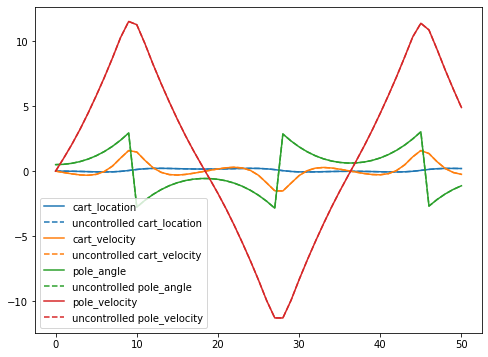

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8,6))
color_list = ['C{}--'.format(i) for i in range(4)]
for i in [0,1,2,3]:
    ax.plot([i for i in range(steps+1)], [x[i] for x in x_history], label=index_to_variable[i])
    ax.plot([i for i in range(steps+1)], [uc[i] for uc in uncontrolled_history], color_list[i], 
            label='uncontrolled {}'.format(index_to_variable[i]))
ax.legend()
# ax.set_ylim(-3,3)
# plt.savefig(plot_path + 'bad_stabilisation_again')